<a href="https://colab.research.google.com/github/sonupp13/MACHINE-LEARNING-ALGORITHMS/blob/main/UNSUPERVISED%20ML/DS_HIERARCHIAL_CLUSTERUNG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers (1).csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


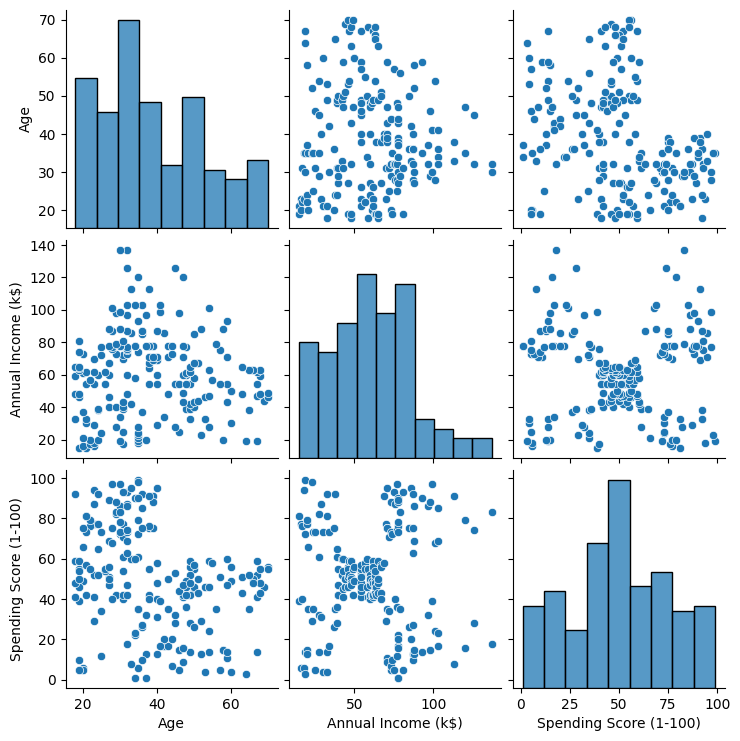

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


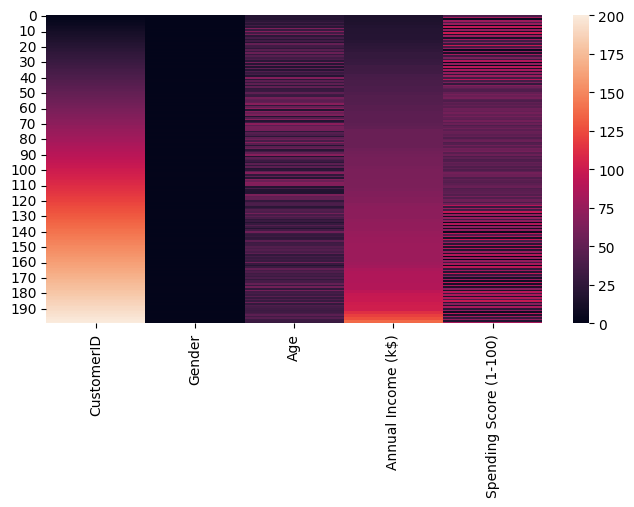

In [ ]:
plt.figure(1, figsize = (8 ,4))
sns.heatmap(df)
plt.show()

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
linked = linkage(X, method='ward')

#Linkage Matrix: The linkage function generates a linkage matrix,
# a crucial component of hierarchical clustering that stores information about how  clusters are merged at each step.
# method='ward': Specifies the Ward linkage method, which minimizes the within-cluster
# variance at each merging step, often leading to compact and spherical clusters.

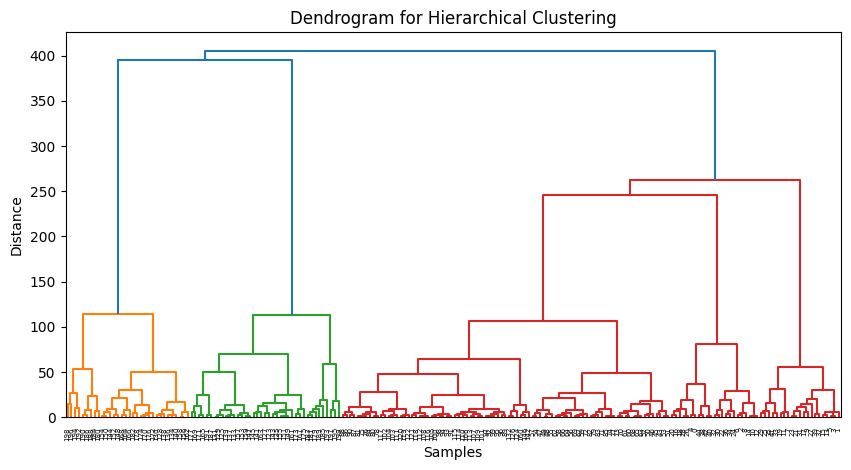

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = hc.fit_predict(X)

# linkage: This parameter specifies the linkage criterion used to decide the merging strategy.
# In this case,   it's set to 'ward'. Ward's method is a hierarchical clustering algorithm that minimizes the variance when forming clusters.
# Other linkage options include 'complete', 'average', and 'single'.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
df['Cluster'] = y_pred
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

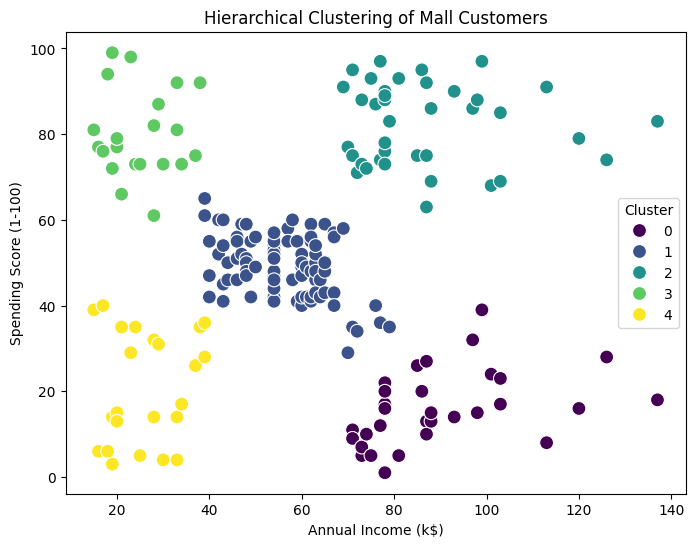

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,hue='Cluster', palette='viridis', s=100)
plt.title('Hierarchical Clustering of Mall Customers')
plt.show()

In [ ]:
from sklearn import metrics
silhouette = metrics.silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5529945955148897


In [ ]:
# Our plot visualizes how customers are grouped based on these attributes after clustering.
# By using Agglomerative Clustering on our mall_customer information, we grouped them based on
# how much they earn, spend, and their age.
# So, This customer segmentation helps us discover better ways to sell products/services and grow
# our business.